# Assignment12
# Name : Junha Lee
# Student ID : 2017220159
# https://github.com/myosoo/Assignment12

# Import packages 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy import linalg as LA

# A set of data $((x_1, y_1),(x_2, y_2), \cdot\cdot\cdot (x_n, y_n))$ is generated

In [2]:
num = 1001
std = 5

# x : x-coordinate data
# y1 : (clean) y-coordinate data
# y2 : (noisy) y-coordinate data

def fun(x):
    f = np.abs(x) * np.sin(x)
    return f

n = np.random.rand(num)
nn = n - np.mean(n)
x = np.linspace(-10, 10, num)
y1 = fun(x)
y2 = y1 + nn * std

# Define vandemonde matrix : 
$\begin{bmatrix}
x_0^0 & x_0^1 & x_0^2 & \cdots & x_0^p \\
x_1^0 & x_1^1 & x_1^2 & \cdots & x_1^p \\
x_2^0 & x_2^1 & x_2^2 & \cdots & x_2^p \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_n^0 & x_n^1 & x_n^2 & \cdots & x_n^p
\end{bmatrix}$

In [3]:
def Vandermonde_Matrix(x, p):
    return np.column_stack(x ** (i) for i in range(p + 1))

### Find an optimal set of model parameters that provide the least square approximate solution : 
$\varepsilon(\theta, \lambda) = \lVert {\mathbf{A} \cdot \theta - y} \lVert^2 + \lambda\lVert \theta \lVert^2  = {\begin{Vmatrix}
{\begin{vmatrix}
\mathbf{A}\\
\sqrt{\lambda}\\
\end{vmatrix}}\theta -
{\begin{vmatrix}
y\\
0\\
\end{vmatrix}}
\end{Vmatrix}}^2 \Rightarrow \lVert Ax+b \lVert^2 form,$ 
$\theta = (\mathbf{A}^T\mathbf{A})^\mathbf{-1}\mathbf{A}^T\mathbf{y_2}$

In [4]:
def Training_theta(A, lamb, y2):
    block_matrix = np.concatenate((A, np.sqrt(lamb) * np.identity(A.shape[1])), axis = 0)
    b = np.concatenate((np.reshape(y2,(y2.size, 1)), np.zeros((A.shape[1], 1))), axis = 0)
    return np.linalg.pinv(block_matrix).dot(b) 

# Define approximation model : $\hat{f}(x_n) = \mathbf{A} \cdot \theta$

In [5]:
def Approximation_model(A, Theta):
    return np.matmul(A, Theta)

In [6]:
def Least_square_error(app_model, y2, lamb, Theta):
    return LA.norm(app_model - y2) + LA.norm(lamb * Theta)

# Plot the polynomial curves that ﬁt the noisy data by the least square error with varying $\lambda = 1, 10^4, 10^6$ with fixed each $p = 6, 7, 8, 9, \cdot\cdot\cdot, 15$

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


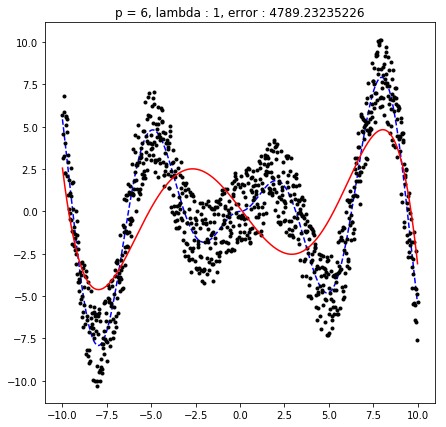

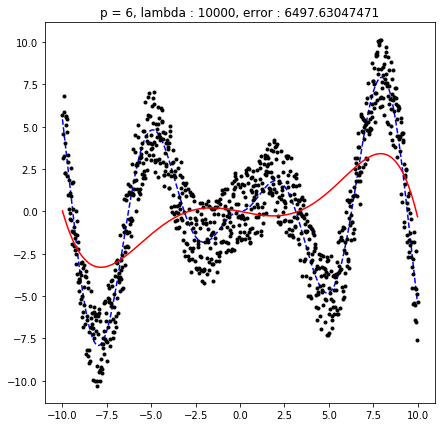

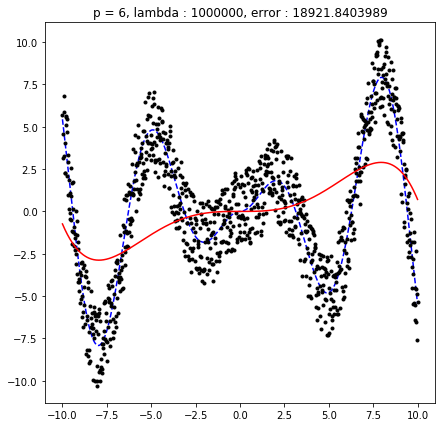

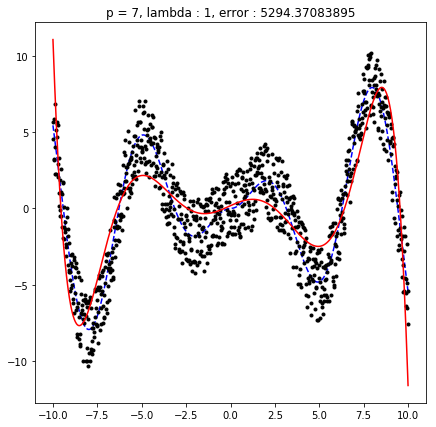

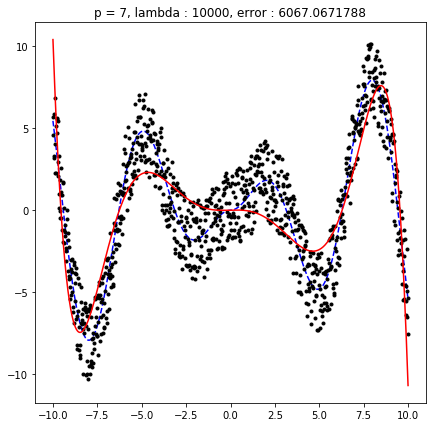

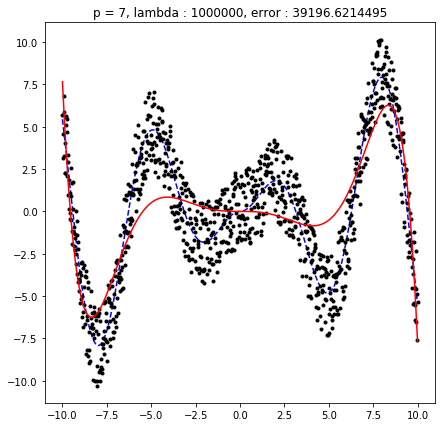

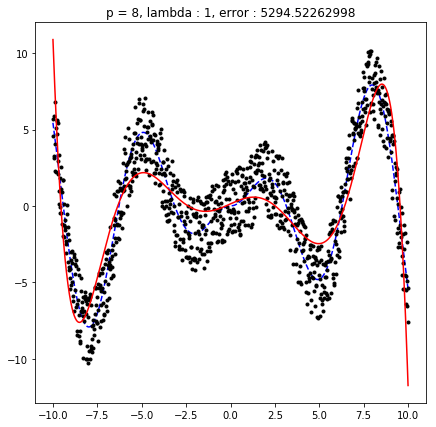

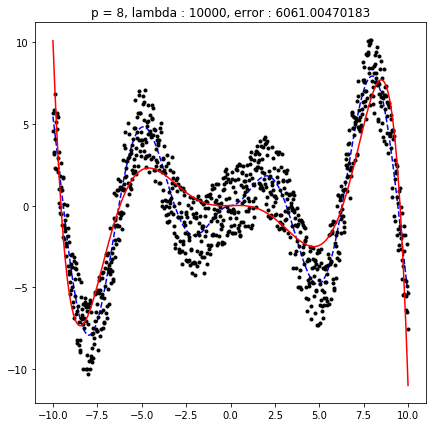

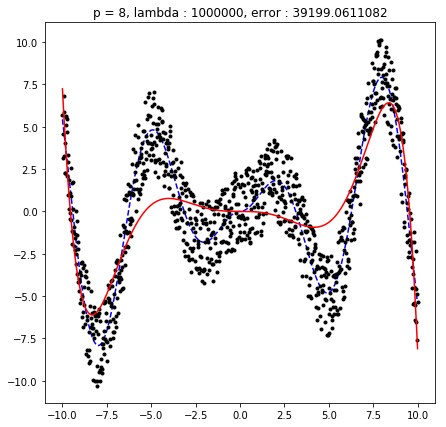

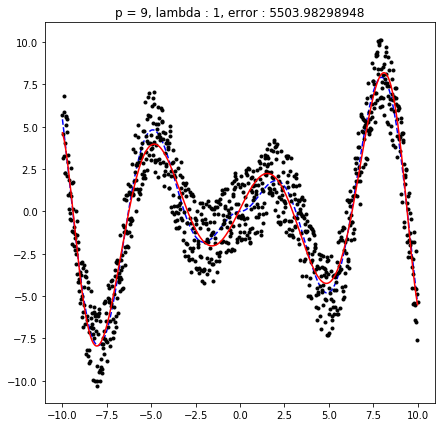

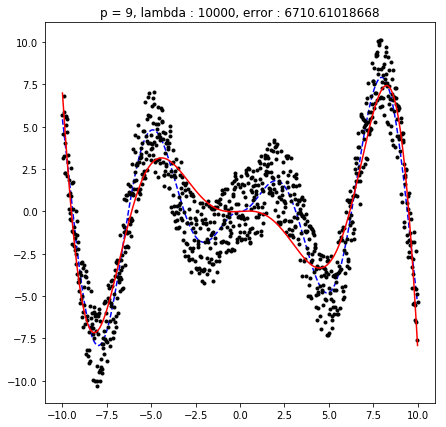

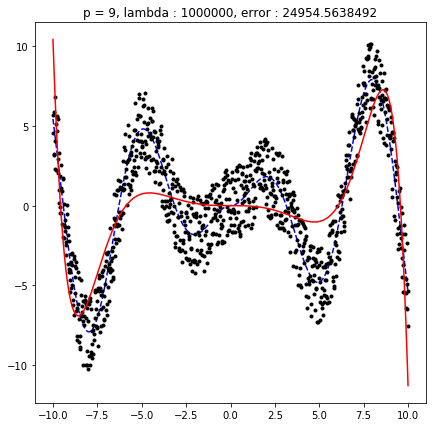

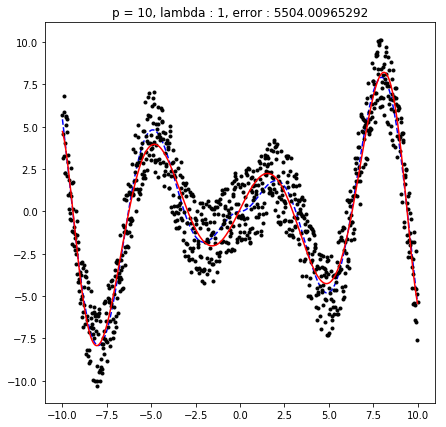

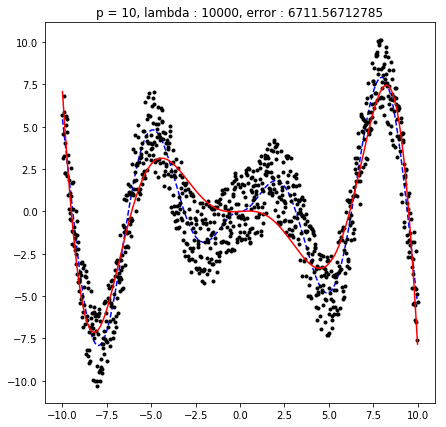

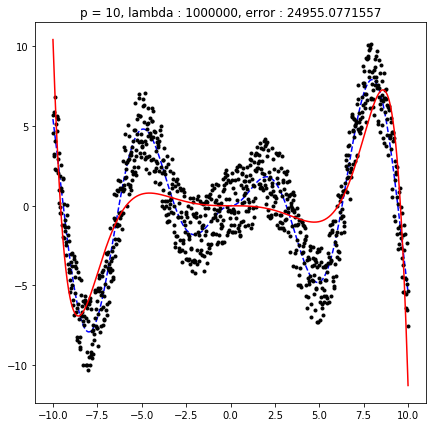

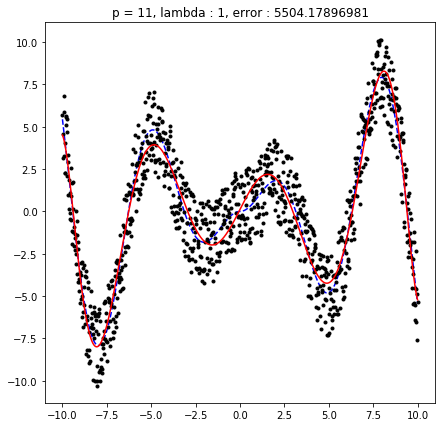

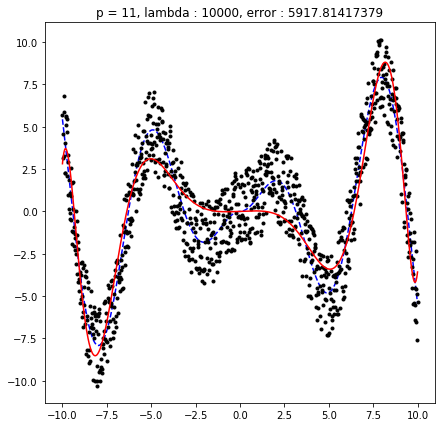

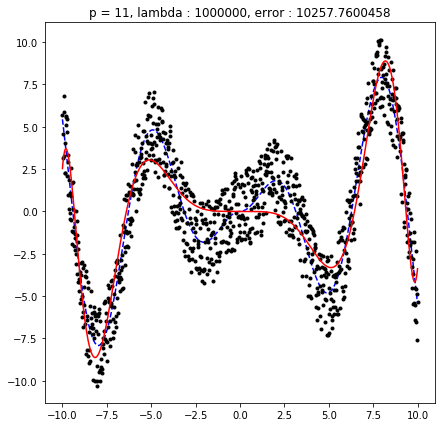

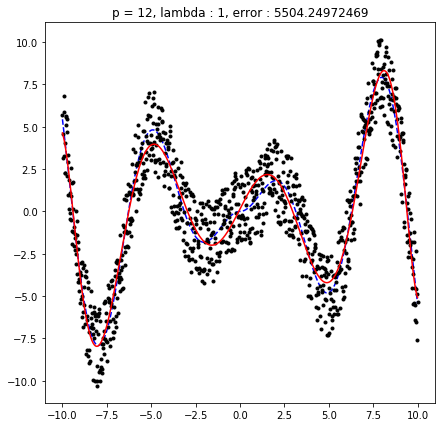

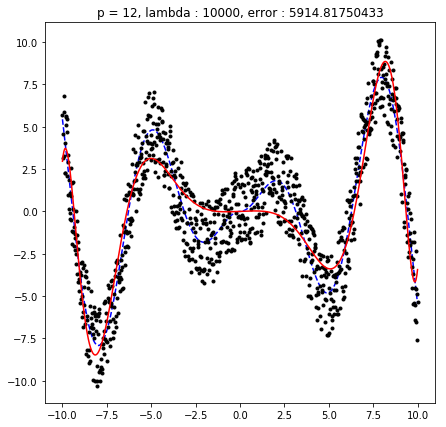

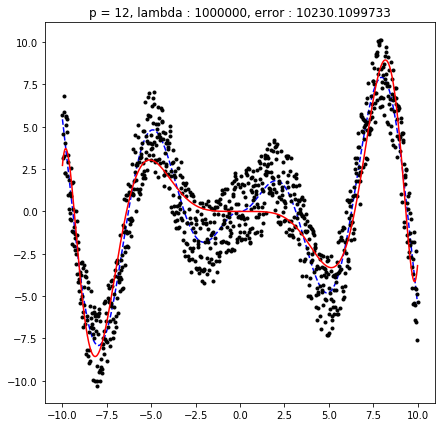

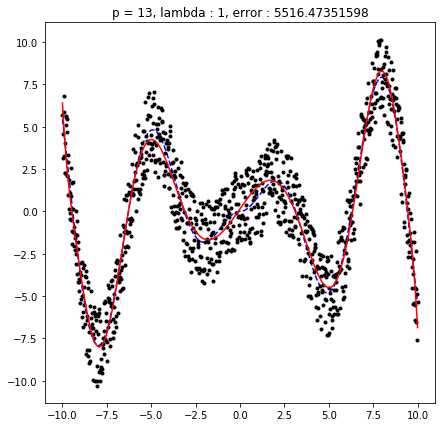

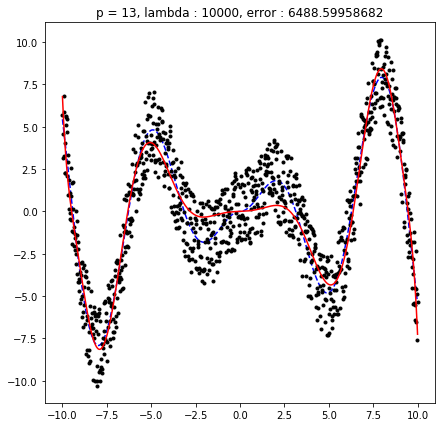

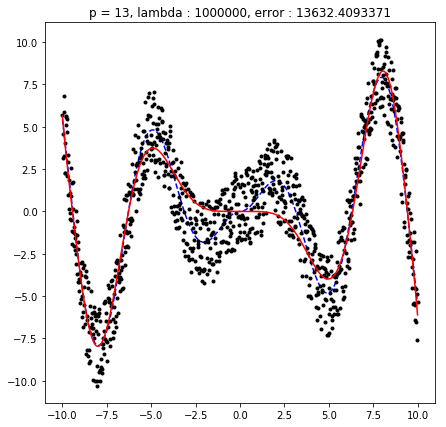

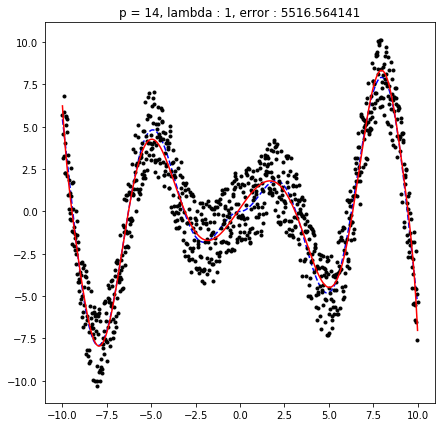

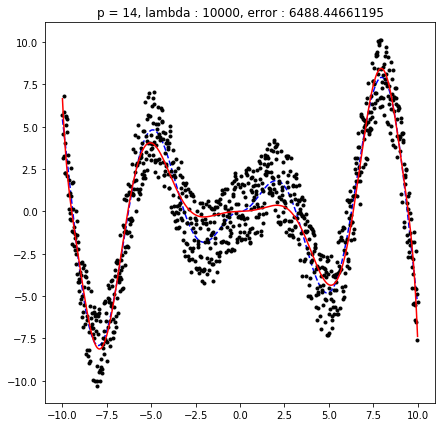

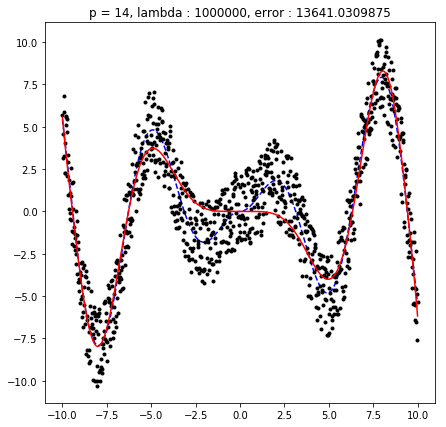

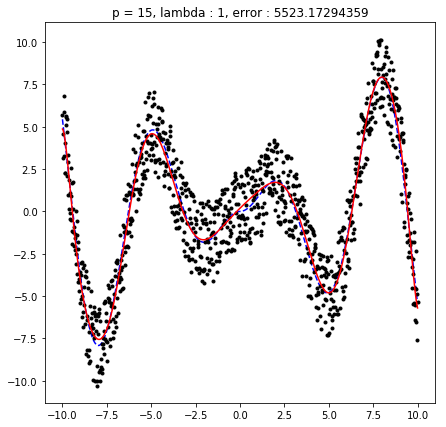

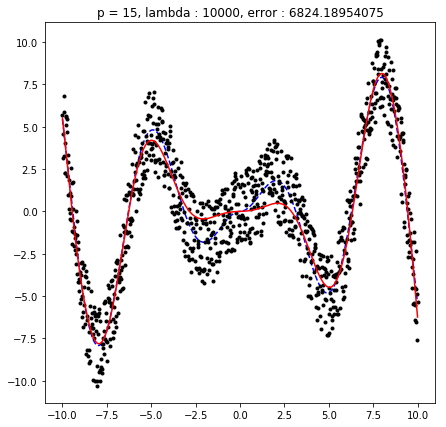

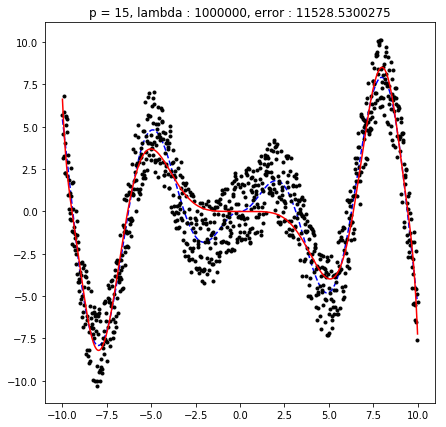

In [7]:
lamb_list = [1, 10 ** 4, 10 ** 6]
error_log = []

for i in range(6, 16):
    for lamb in lamb_list:
        A = Vandermonde_Matrix(x, i)
        Theta = Training_theta(A, lamb, y2)
        app_model = Approximation_model(A, Theta)
        error = Least_square_error(app_model, y2, lamb, Theta)
        error_log.append(error)
    
        plt.figure(figsize = (7, 7))
        plt.title('p = '+ str(i) + ', lambda : ' + str(lamb) + ', error : ' + str(error))
        plt.plot(x, y1, 'b--', x, y2, 'k.', x, app_model, 'r-')

# Plot the energy $\varepsilon(\theta, \lambda) = \lVert {\mathbf{A} \cdot \theta - y} \lVert^2 + \lambda\lVert \theta \lVert^2$ with varying $\lambda$

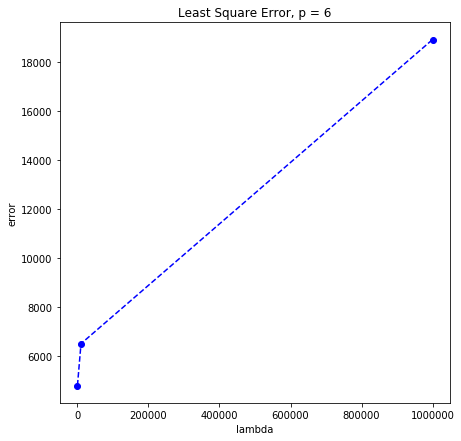

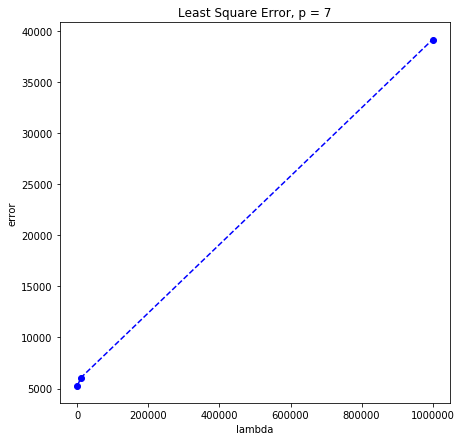

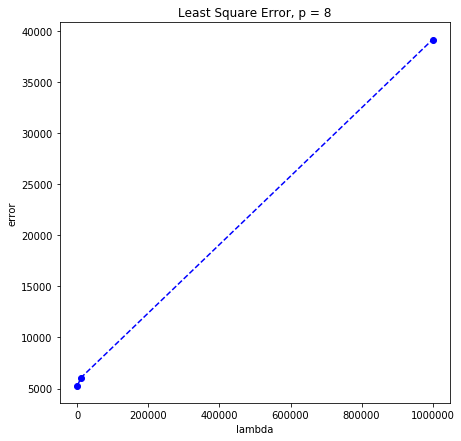

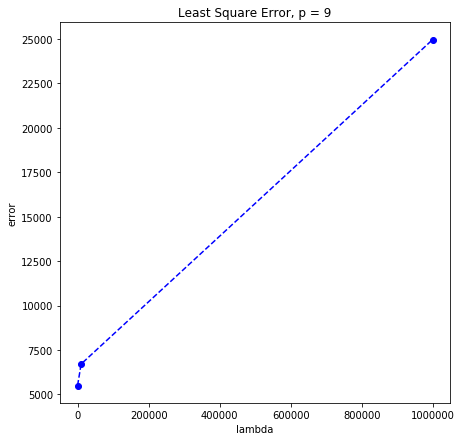

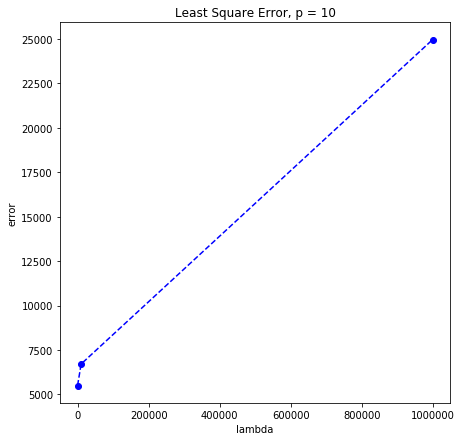

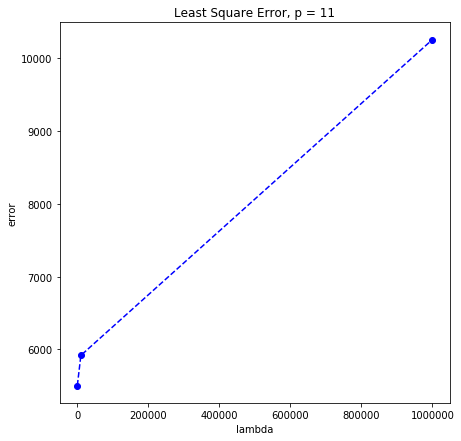

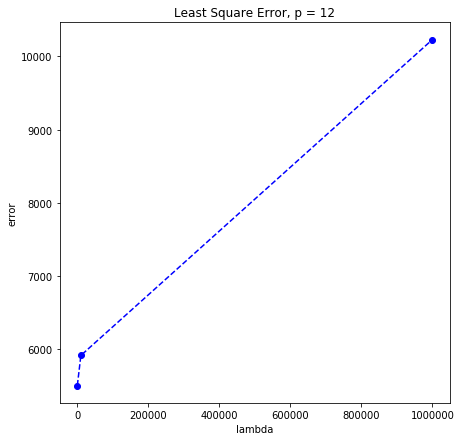

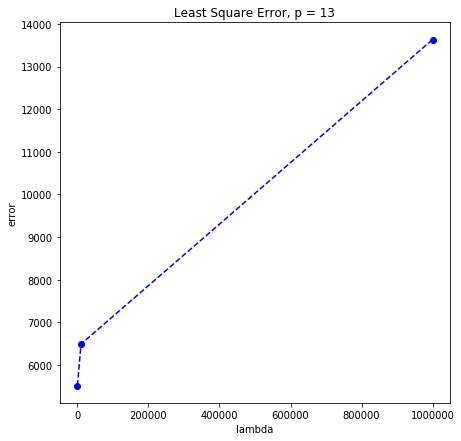

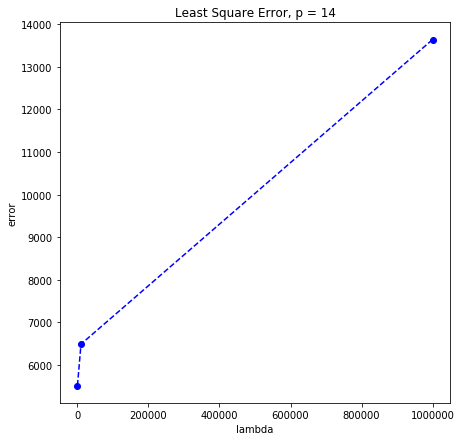

In [8]:
for i in range(1, 10):
    plt.figure(figsize=(7,7))
    plt.plot(lamb_list, error_log[3*(i-1):3*i], color = 'b', marker = 'o', linestyle = '--')
    plt.title
    plt.xlabel('lambda')
    plt.ylabel('error')
    plt.title('Least Square Error' + ', p = '+ str(i + 5))
    plt.show()